##### a) Investigate the performance of a number of machine learning procedures on this dataset. 

In [1]:
# Importing libraries for data loading and visualization..
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read training dataset
td = pd.read_csv("CE802_P3_Data.csv")
td.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.00,1.73,3.14,5.73,-5.48,-743.61,152.20,Europe,3,1577.82,-383.82,12,-2289.14,-19.69,High,25354.83,167.75
1,9.84,3.46,6.02,14.42,-10.94,-820.35,68.56,Rest,4,1884.69,-488.34,6,-2899.20,-19.46,Very low,32380.17,704.46
2,4.14,-1.95,6.96,4.27,-7.94,-818.43,107.86,Rest,4,2063.79,-287.76,6,-2885.52,-20.57,Very high,28882.38,302.43
3,20.06,-3.34,3.76,4.78,-6.30,-814.53,147.04,UK,7,1319.19,-435.54,4,-2319.80,-20.24,Very high,28523.04,2420.98
4,63.63,-0.97,11.08,5.66,-9.60,-847.41,99.70,Europe,1,1921.14,-246.45,10,-1344.40,-21.90,Medium,27915.81,271.65


In [3]:
# checking the features, their shape, duplicate values and nan values in the Datasets

print("\nFeatures Present in the Dataset: \n", td.columns)


Features Present in the Dataset: 
 Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'Target'],
      dtype='object')


In [4]:
# check total numbers of rows and features in dataset
shape=td.shape
print("\nTotal Number of Rows : ",shape[0])
print("Total Number of Features : ", shape[1])


Total Number of Rows :  1500
Total Number of Features :  17


In [5]:
# check data types and NaN cells in given data
print("\n\nData Types of Features :\n", td.dtypes)
print("\nDataset contains any NaN/Empty cells : ", td.isnull().values.any())



Data Types of Features :
 F1        float64
F2        float64
F3        float64
F4        float64
F5        float64
F6        float64
F7        float64
F8         object
F9          int64
F10       float64
F11       float64
F12         int64
F13       float64
F14       float64
F15        object
F16       float64
Target    float64
dtype: object

Dataset contains any NaN/Empty cells :  False


In [6]:
print("\nTotal number of empty rows in each feature:\n", td.isnull().sum(),"\n\n")
print("Total number of unique values in each feature:")
for col in td.columns.values:
    print("Number of unique values of {} : {}".format(col, td[col].nunique()))


Total number of empty rows in each feature:
 F1        0
F2        0
F3        0
F4        0
F5        0
F6        0
F7        0
F8        0
F9        0
F10       0
F11       0
F12       0
F13       0
F14       0
F15       0
F16       0
Target    0
dtype: int64 


Total number of unique values in each feature:
Number of unique values of F1 : 703
Number of unique values of F2 : 833
Number of unique values of F3 : 728
Number of unique values of F4 : 737
Number of unique values of F5 : 839
Number of unique values of F6 : 1411
Number of unique values of F7 : 1405
Number of unique values of F8 : 4
Number of unique values of F9 : 12
Number of unique values of F10 : 1492
Number of unique values of F11 : 1399
Number of unique values of F12 : 11
Number of unique values of F13 : 1488
Number of unique values of F14 : 905
Number of unique values of F15 : 5
Number of unique values of F16 : 1500
Number of unique values of Target : 1051


In [7]:
print ('\n Average of Target variable is : ','\n',td["Target"].mean())


 Average of Target variable is :  
 922.0825333333332


In [8]:
# Checking Statistical Informations...
td.describe()

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F16,Target
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,63.602773,-0.104847,8.109187,4.041660,-8.765747,-815.349400,123.191920,3.947333,1334.90566,-341.195900,7.885333,-2173.617040,-20.066667,24202.705020,922.082533
std,774.154296,3.040026,5.812853,2.893909,6.048501,126.724179,58.613624,1.836702,904.26205,89.572842,3.620072,592.936195,4.183142,13329.106617,1092.331874
min,0.000000,-10.170000,0.080000,0.040000,-27.620000,-1658.250000,-56.180000,0.000000,-1743.24000,-697.350000,0.000000,-4161.840000,-36.320000,-35082.450000,0.000000
25%,0.130000,-2.060000,3.815000,1.945000,-13.000000,-875.347500,83.900000,3.000000,732.36000,-401.340000,6.000000,-2578.875000,-22.045000,18069.450000,0.000000
50%,1.010000,-0.000000,6.740000,3.415000,-8.760000,-815.535000,121.580000,4.000000,1324.15500,-341.055000,8.000000,-2179.270000,-20.085000,24205.875000,429.570000
75%,6.805000,1.875000,10.945000,5.492500,-4.520000,-752.130000,161.920000,5.000000,1962.12750,-278.595000,10.000000,-1763.605000,-18.175000,30911.280000,1530.205000
max,27474.530000,9.600000,45.140000,23.390000,9.280000,-243.840000,328.100000,11.000000,4487.55000,-25.530000,20.000000,-45.160000,7.550000,85263.240000,3960.010000


In [9]:
# Checking the correlation between the features and the label...
td.corr()

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F16,Target
F1,1.000000,0.014330,0.059413,-0.005763,0.032332,-0.027544,0.011987,0.046442,0.040372,0.006548,-0.013561,0.006771,-0.001758,0.066430,0.027713
F2,0.014330,1.000000,-0.018861,0.021228,0.017546,0.008484,-0.012457,0.026931,0.039825,-0.004979,0.006276,0.019297,-0.025476,0.042207,0.011330
F3,0.059413,-0.018861,1.000000,-0.022325,0.037862,0.026478,0.046542,-0.028201,-0.012850,-0.017902,-0.013474,0.005397,-0.032430,0.060349,0.357137
F4,-0.005763,0.021228,-0.022325,1.000000,0.009609,0.014407,0.000099,0.003647,-0.041882,0.050148,0.005589,-0.001317,-0.036053,-0.007184,0.346373
F5,0.032332,0.017546,0.037862,0.009609,1.000000,-0.031183,0.000302,-0.002310,-0.004091,0.012025,-0.004793,-0.023763,0.020489,-0.006157,0.020443
F6,-0.027544,0.008484,0.026478,0.014407,-0.031183,1.000000,-0.009240,0.016949,-0.016704,-0.002309,0.007359,0.072085,0.006407,-0.012488,0.031407
F7,0.011987,-0.012457,0.046542,0.000099,0.000302,-0.009240,1.000000,-0.018839,-0.051243,0.012594,-0.011457,0.006295,-0.027557,0.007560,0.430990
F9,0.046442,0.026931,-0.028201,0.003647,-0.002310,0.016949,-0.018839,1.000000,0.007670,0.000822,0.006516,0.014783,-0.022900,0.004651,0.193704
F10,0.040372,0.039825,-0.012850,-0.041882,-0.004091,-0.016704,-0.051243,0.007670,1.000000,0.061850,-0.002825,0.007113,-0.000184,-0.007832,-0.263022
F11,0.006548,-0.004979,-0.017902,0.050148,0.012025,-0.002309,0.012594,0.000822,0.061850,1.000000,-0.064451,-0.001042,0.035125,0.013438,0.015412


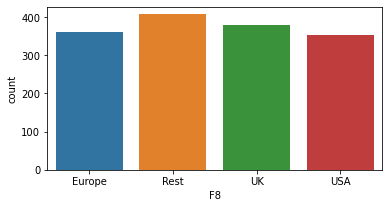

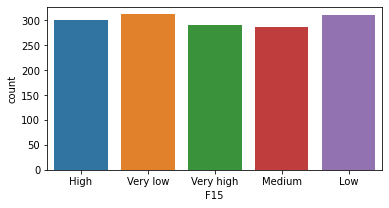

In [10]:
# For loop to display some important features counts in one go...
list=['F8','F15']
for i in list:
    plt.subplots(figsize=(6,3))
    sns.countplot(i,data=td)
    plt.show()

In [11]:
# Checking skewness
td.skew()

F1        30.682088
F2        -0.087231
F3         1.458260
F4         1.497921
F5         0.018367
F6        -0.045611
F7         0.127851
F9         0.390727
F10        0.025423
F11       -0.045861
F12        0.393697
F13        0.025181
F14        0.446734
F16       -0.064664
Target     1.119126
dtype: float64

In [12]:
td["F1"] = np.log1p(td["F1"])

In [13]:
td["F8"].value_counts()

Rest      407
UK        380
Europe    360
USA       353
Name: F8, dtype: int64

In [14]:
#label encoding the data 
from sklearn.preprocessing import LabelEncoder 
lbe = LabelEncoder() 
td["F8"]= lbe.fit_transform(td["F8"]) 
td["F15"]= lbe.fit_transform(td["F15"]) 

In [15]:
td.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.000000,1.73,3.14,5.73,-5.48,-743.61,152.20,0,3,1577.82,-383.82,12,-2289.14,-19.69,0,25354.83,167.75
1,2.383243,3.46,6.02,14.42,-10.94,-820.35,68.56,1,4,1884.69,-488.34,6,-2899.20,-19.46,4,32380.17,704.46
2,1.637053,-1.95,6.96,4.27,-7.94,-818.43,107.86,1,4,2063.79,-287.76,6,-2885.52,-20.57,3,28882.38,302.43
3,3.047376,-3.34,3.76,4.78,-6.30,-814.53,147.04,2,7,1319.19,-435.54,4,-2319.80,-20.24,3,28523.04,2420.98
4,4.168679,-0.97,11.08,5.66,-9.60,-847.41,99.70,0,1,1921.14,-246.45,10,-1344.40,-21.90,2,27915.81,271.65


In [16]:
x_train=td.drop(['Target'],axis=1)
print(x_train.shape)

(1500, 16)


In [17]:
# Setting up the Target value in variable y1.
y_train=td['Target']
y_train.shape

(1500,)

In [18]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [19]:
# Create an object lr for the Linear Regression model
lr = LinearRegression()
# Fit the model on the training data
lr.fit(x_train, y_train)

LinearRegression()

In [20]:
# R2 for train and test data
R2_reg_train = lr.score(x_train,y_train)
print('R squared value: %.3f' %(R2_reg_train))

R squared value: 0.665


In [21]:
from math import sqrt
RMSE_reg_train = sqrt(np.mean((y_train - lr.predict(x_train))**2))
print('Root mean squared error value: %.3f' %(RMSE_reg_train))

Root mean squared error value: 631.925


Text(0.5, 1.0, 'Residual Plot')

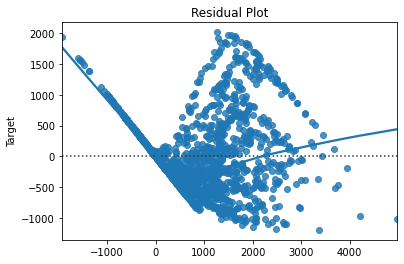

In [22]:
sns.residplot(x=lr.predict(x_train), y=y_train, lowess=True)
plt.title('Residual Plot')

In [23]:
# Create an object for Ridge
ridge_reg = Ridge()
# Fit the model to our training data
ridge_reg.fit(x_train,y_train)

Ridge()

In [24]:
from sklearn.model_selection import  GridSearchCV
# Import library to find out score (R2)
from sklearn.metrics import r2_score

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
ridge_grid = GridSearchCV(estimator=ridge_reg, param_grid = dict(alpha=alphas), scoring = 'r2')

# Fit the training model 
ridge_grid.fit(x_train, y_train)

# Get the best alpha value and it's respective R2 score
print("Best alpha value is: %s" % ridge_grid.best_params_["alpha"])

Best alpha value is: 10


In [25]:
R2_ridge_grid_train = r2_score(ridge_grid.predict(x_train), y_train)
print('R squared value: %.3f' %(R2_ridge_grid_train))

R squared value: 0.496


In [26]:
RMSE_ridge_grid_train = sqrt(mean_squared_error(ridge_grid.predict(x_train), y_train))
print('Root mean squared error value: %.3f' %(RMSE_ridge_grid_train))

Root mean squared error value: 631.925


In [27]:
# Create an object 
lasso = Lasso(max_iter = 50000, tol=0.1)
# Fit the model on the trainng data
lasso.fit(x_train, y_train)

Lasso(max_iter=50000, tol=0.1)

In [28]:
# Import library to find out score (R2)
from sklearn.metrics import r2_score

# Define an array of alpha values
alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Define GridSearchCV 
lasso_grid = GridSearchCV(estimator = lasso, param_grid = dict(alpha=alphas), scoring='r2')

# Fit the training model 
lasso_grid.fit(x_train, y_train)

# Get the best alpha value and it's respective R2 score
print('Best alpha value is: %s' % lasso_grid.best_params_['alpha'])

Best alpha value is: 10


In [29]:
R2_lasso_grid_train = r2_score(lasso_grid.predict(x_train), y_train)
print('R squared value: %.3f' %(R2_lasso_grid_train))

R squared value: 0.490


In [30]:
RMSE_lasso_grid_train = sqrt(mean_squared_error(lasso_grid.predict(x_train), y_train))
print('Root mean squared error value: %.3f' %(RMSE_lasso_grid_train))

Root mean squared error value: 632.085


In [31]:
from collections import OrderedDict
# Create a dictionary to store the train and test scores, best alpha values
scores = {'Index': ['Linear Reg','Ridge_GridSearchCV', 'Lasso_GridSearchCV'],
         'RMSE_train': [631.925, 631.925, 632.085],
         'R2_train': [0.665, 0.496,0.490 ],
         'Best_alpha': ['N/A', 10.0, 10.0]}
scores = OrderedDict(scores)

In [32]:
# Create a dataframe from the dictionary
reg_models_scores = pd.DataFrame.from_dict(scores)
reg_models_scores.style.background_gradient(cmap='YlGnBu')

,Index,RMSE_train,R2_train,Best_alpha
0,Linear Reg,631.925000,0.665000,N/A
1,Ridge_GridSearchCV,631.925000,0.496000,10.000000
2,Lasso_GridSearchCV,632.085000,0.490000,10.000000


<AxesSubplot:xlabel='R2_train', ylabel='Index'>

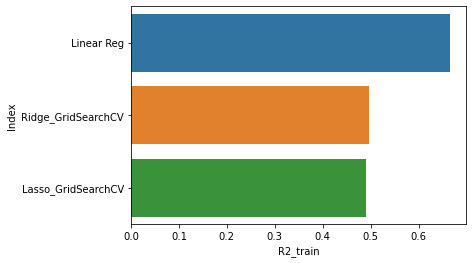

In [33]:
# visualisation of R2 Score
sns.barplot(y=reg_models_scores.Index,x=reg_models_scores.R2_train)

###  From above results we can say that Linear regression method result is good compared to other two regression models.

In [34]:
test_data = pd.read_csv("CE802_P3_Test.csv")

In [35]:
test_data.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.04,-0.21,3.68,1.54,-6.70,-929.34,234.18,USA,2,3391.35,-415.41,6,-1460.14,-20.55,Low,31369.98,NaN
1,0.89,2.97,2.28,1.97,-4.52,-700.62,106.84,Rest,2,3479.19,-320.73,2,-2301.76,-27.90,Low,29173.89,NaN
2,0.37,-0.17,7.14,0.40,-14.26,-796.14,32.30,USA,5,918.93,-379.44,4,-2589.08,-20.52,Very low,17248.26,NaN
3,5.37,0.07,7.18,6.81,-6.14,-801.03,32.92,Europe,2,2657.43,-491.28,6,-1767.44,-25.81,Low,15450.54,NaN
4,0.26,6.16,3.54,1.10,-16.76,-652.08,227.98,Rest,4,2739.96,-378.48,10,-1823.32,-23.11,Very low,35745.03,NaN


In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      1500 non-null   float64
 1   F2      1500 non-null   float64
 2   F3      1500 non-null   float64
 3   F4      1500 non-null   float64
 4   F5      1500 non-null   float64
 5   F6      1500 non-null   float64
 6   F7      1500 non-null   float64
 7   F8      1500 non-null   object 
 8   F9      1500 non-null   int64  
 9   F10     1500 non-null   float64
 10  F11     1500 non-null   float64
 11  F12     1500 non-null   int64  
 12  F13     1500 non-null   float64
 13  F14     1500 non-null   float64
 14  F15     1500 non-null   object 
 15  F16     1500 non-null   float64
 16  Target  0 non-null      float64
dtypes: float64(13), int64(2), object(2)
memory usage: 199.3+ KB


In [37]:
test_data["F8"]= lbe.fit_transform(test_data["F8"]) 
test_data["F15"]= lbe.fit_transform(test_data["F15"]) 

In [38]:
x_test=test_data.drop(['Target'],axis=1)
y_test=test_data['Target']

### b) Prediction on a hold-out test set.

In [39]:
# Using Linear Regression for final model
Predictions = lr.predict(x_test)

In [40]:
# Saving predicted values
x_test["Target"] = Predictions
x_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.04,-0.21,3.68,1.54,-6.70,-929.34,234.18,3,2,3391.35,-415.41,6,-1460.14,-20.55,1,31369.98,975.943680
1,0.89,2.97,2.28,1.97,-4.52,-700.62,106.84,1,2,3479.19,-320.73,2,-2301.76,-27.90,1,29173.89,-321.350724
2,0.37,-0.17,7.14,0.40,-14.26,-796.14,32.30,3,5,918.93,-379.44,4,-2589.08,-20.52,4,17248.26,-20.925263
3,5.37,0.07,7.18,6.81,-6.14,-801.03,32.92,0,2,2657.43,-491.28,6,-1767.44,-25.81,1,15450.54,242.506482
4,0.26,6.16,3.54,1.10,-16.76,-652.08,227.98,1,4,2739.96,-378.48,10,-1823.32,-23.11,4,35745.03,584.293488


In [41]:
x_test.to_csv("CE802_P3_Test_new.csv")